<a href="https://colab.research.google.com/github/ad17171717/YouTube-Tutorials/blob/main/Google%20Colab%20Tutorials/Taking_Pictures_with_Google_Colab!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import io
import PIL.Image

# **Taking a Picture within Google Colab**

**Because a Google Colab Session runs in the cloud it cannot directly access the hardware on your local computer. However, since Google Colab is being accessed through a web browser, we can use JavaScript within our Google Colab session to access our camera on our local computer. Using a JavaScript function we can access the browser API that lets web pages access your camera.**

**Please note that I am using Google Chrome for my web browser**

## **JavaScript Code**

In [2]:
#JavaScript to capture image with a button
#generated by ChatGPT
js = '''
async function takePhoto() {
  const video = document.createElement('video');
  const capture = document.createElement('button');
  capture.textContent = '📸 Capture Photo';

  document.body.appendChild(video);
  document.body.appendChild(capture);

  const stream = await navigator.mediaDevices.getUserMedia({video: true});
  video.srcObject = stream;
  await video.play();

  await new Promise((resolve) => capture.onclick = resolve);

  const canvas = document.createElement('canvas');
  canvas.width = video.videoWidth;
  canvas.height = video.videoHeight;
  canvas.getContext('2d').drawImage(video, 0, 0);

  stream.getTracks().forEach(track => track.stop());
  video.remove();
  capture.remove();

  return canvas.toDataURL('image/jpeg');
}
'''

## **Creating a Python Function to Capture a Photo**

**In order to execute the JavaScript code we can use the `evaluate_js` function from the IPython module. For the code block below we will create a function `take_photo` which will execute the JavaScript code, allow us to take a photo with our local webcam and will save the image into our content directory.**

In [3]:
def take_photo(image_name='captured_image', image_type='.jpg'):

  '''
  Python function to take a photo within a Google Colab Session and save it
  into the content directory

  Parameters
  ----------
  image_name: Name of the image file
  image_type: Set the image type. It will either save a PNG or JPG/JPEG image

  Returns
  -------
  image: Returns a Pillow image object that represents the captured webcam photo
  '''

  #check that the image type is compatible
  if image_type.lower() not in ['.jpg', '.jpeg', '.png']:
      raise ValueError('Invalid image type. Choose either ".jpg", ".jpeg", or ".png".')

  #display webcam and button
  display(Javascript(js))
  #capture image after button click
  data = eval_js('takePhoto()')
  img_data = base64.b64decode(data.split(",")[1])

  #convert data to image
  image = PIL.Image.open(io.BytesIO(img_data))

  #save image with specified name and image type
  filename = f'{image_name}{image_type}'
  image.save(filename)
  print(f'Image saved as: {filename}')

  return image

<IPython.core.display.Javascript object>

Image saved as: captured_image.jpg


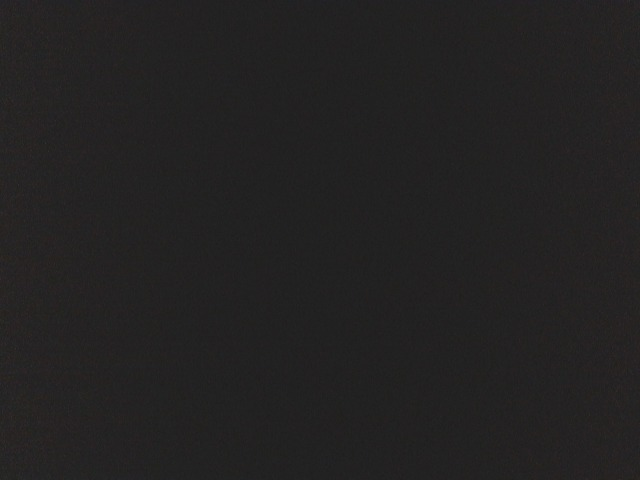

In [5]:
#capture and display photo
image = take_photo()
display(image)

# **References and Additional Learning**

## **Documentation**

- **[Get started with WebRTC (Chrome)](https://web.dev/articles/webrtc-basics) from web.dev by Sam Dutton**

- **[MediaDevices](https://developer.mozilla.org/en-US/docs/Web/API/MediaDevices) from developer.mozilla.org**

- **[MediaDevices: getUserMedia() method](https://developer.mozilla.org/en-US/docs/Web/API/MediaDevices/getUserMedia) from developer.mozilla.org**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [X](https://twitter.com/DolinayG), [GitHub](https://github.com/ad17171717), [Medium](https://adriandolinay.medium.com/) and [Odysee](https://odysee.com/@adriandolinay:0). Happy coding!**

# **Podcast**

- **Check out Adrian's Podcast, The Aspiring STEM Geek on [YouTube](https://www.youtube.com/@AdrianDolinay/podcasts), [Spotify](https://open.spotify.com/show/60dPNJbDPaPw7ru8g5btxV), [Apple Podcasts](https://podcasts.apple.com/us/podcast/the-aspiring-stem-geek/id1765996824), [Audible](https://www.audible.com/podcast/The-Aspiring-STEM-Geek/B0DC73S9SN?eac_link=MCFKvkxuqKYU&ref=web_search_eac_asin_1&eac_selected_type=asin&eac_selected=B0DC73S9SN&qid=IrZ84nGqvz&eac_id=141-8769271-5781515_IrZ84nGqvz&sr=1-1) and [iHeart Radio](https://www.iheart.com/podcast/269-the-aspiring-stem-geek-202676097/)!**